Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [288]:
%pip install scipy==1.6.0

%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sn
import warnings
warnings.filterwarnings("ignore")


import numpy as np

In [2]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')

In [3]:

data.columns.get_loc

<bound method Index.get_loc of Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')>

In [292]:
toyota=data[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]

In [293]:
toyota.columns=['price','age','KM','HP','cc','doors','gears','qtax','wt']

In [294]:
toyota

,price,age,KM,HP,cc,doors,gears,qtax,wt
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [295]:
toyota.isna().sum()

price    0
age      0
KM       0
HP       0
cc       0
doors    0
gears    0
qtax     0
wt       0
dtype: int64

In [296]:
toyota.doors.value_counts()

5    674
3    622
4    138
2      2
Name: doors, dtype: int64

In [297]:
toyota.gears.value_counts()

5    1390
6      43
3       2
4       1
Name: gears, dtype: int64

# Correlation Matrix

In [298]:
toyota.corr()

,price,age,KM,HP,cc,doors,gears,qtax,wt
price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
qtax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
wt,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


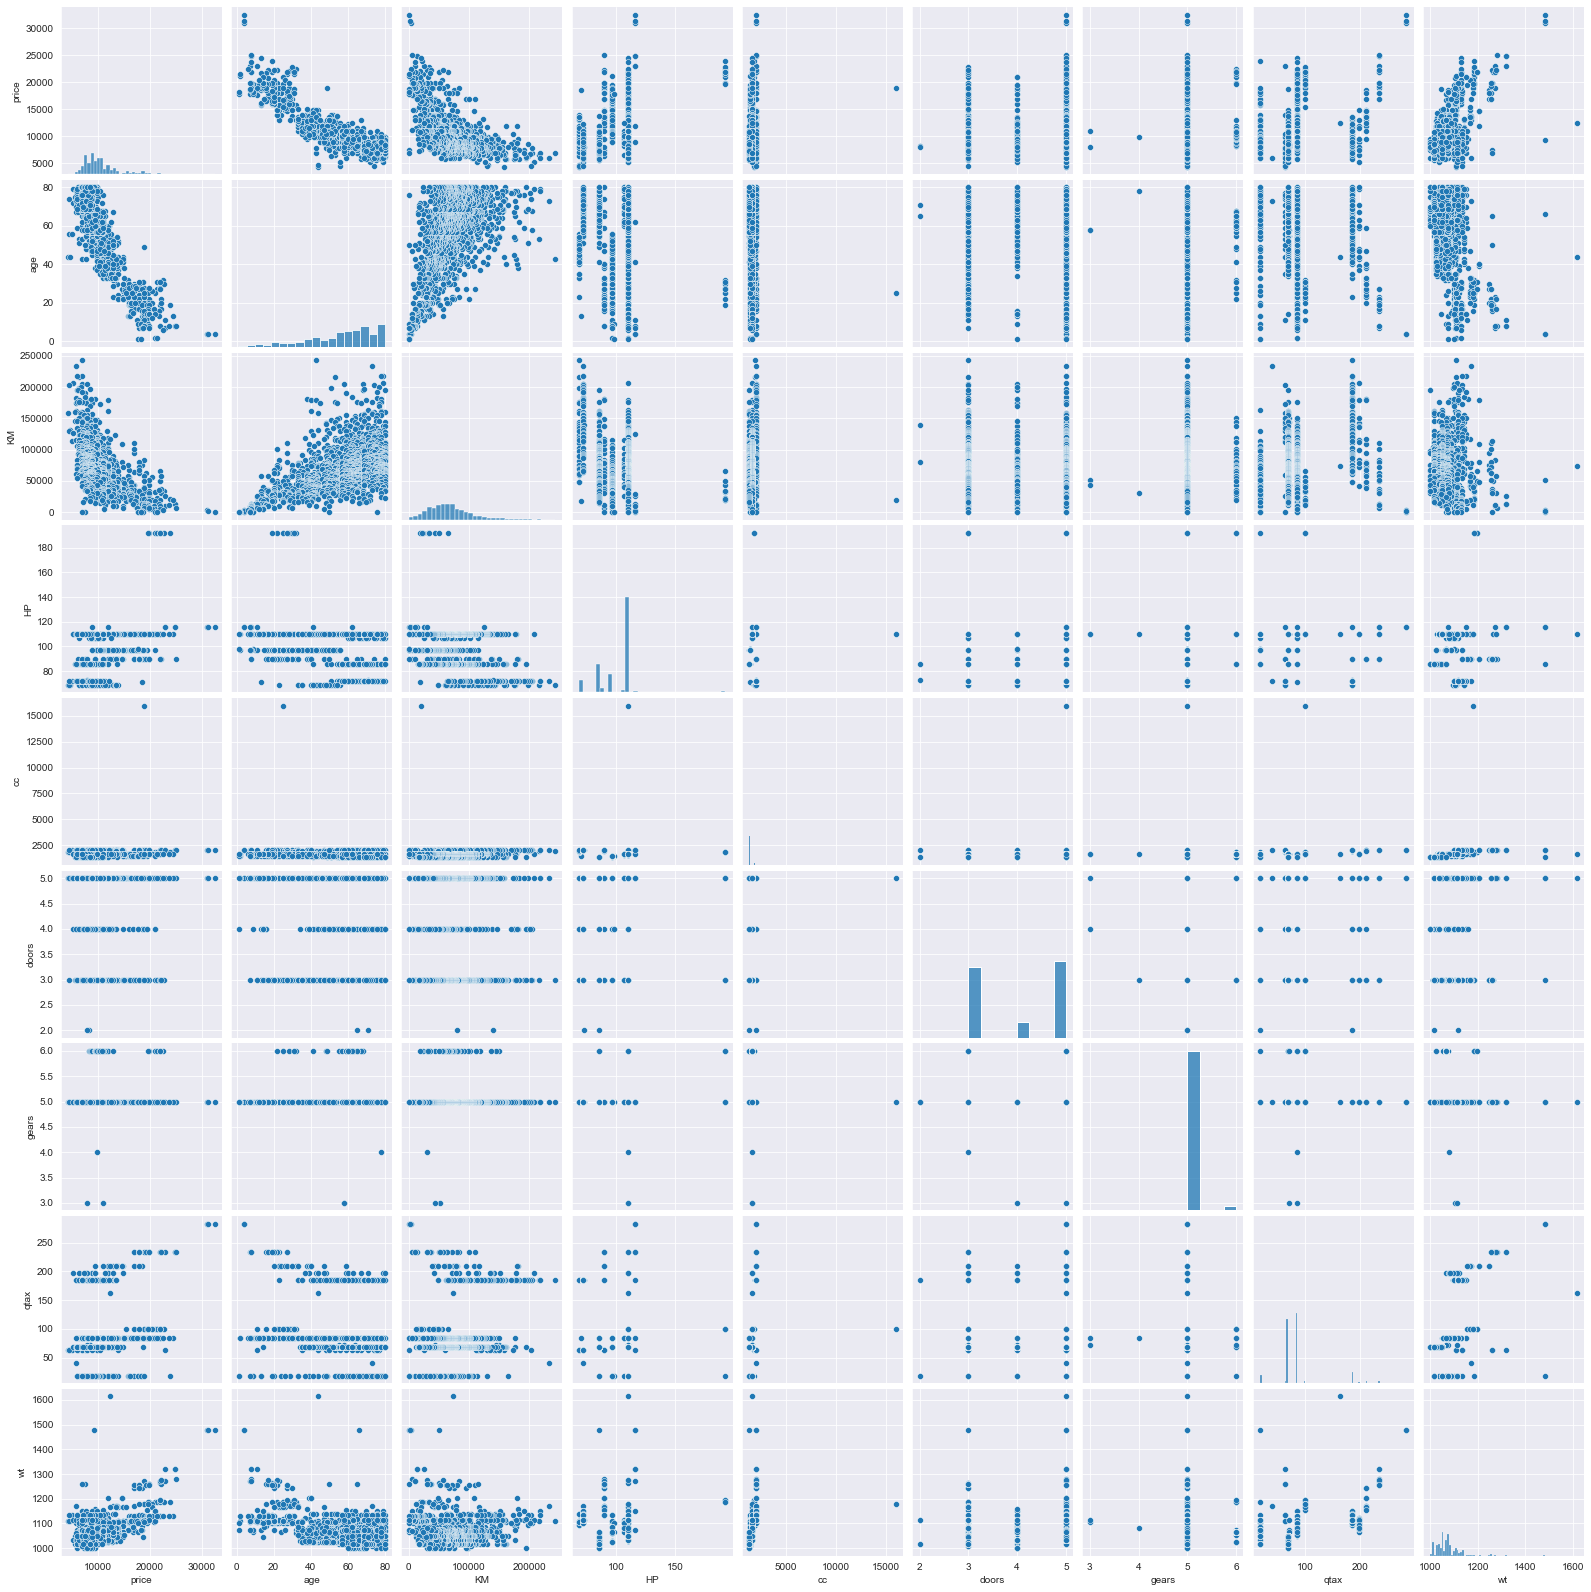

In [299]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota)

In [300]:
Toyota_Price=smf.ols('price~age+KM+HP+cc+doors+gears+qtax+wt',data=toyota).fit()
Toyota_Price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:25:30   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
gears        594.3199    197.055      3.016      0.003     207.771     980.869
qtax           3.9491      1.310      3.015      0.003       1.379       6.519
wt            16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By Above Summary, Pvalue for doors and cc in model are 0.98 and 0.179 so in coming operations we are going to see relation between the features

lets see the p of doors when we sepearte the features

In [301]:
price_d=smf.ols('price~doors',data=toyota).fit()
price_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           1.46e-12
Time:                        14:25:30   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
price_pak=smf.ols('price~age+KM',data=toyota).fit()
price_pak.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     2695.
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:25:30   Log-Likelihood:                -12686.
No. Observations:                1436   AIC:                         2.538e+04
Df Residuals:                    1433   BIC:                         2.539e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.048e+04    140.047    146.259      0.000    2.02e+04    2.08e+04
age         -154.1492      2.736    -56.334      0.000    -159.517    -148.782
KM            -0.0165      0.001    -12.130      0.000      -0.019      -0.014
==============================================================================
Omnibus:                      448.686   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.042
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                      10.019   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [303]:
price_pq=smf.ols('price~qtax',data=toyota).fit()
price_pq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           4.41e-17
Time:                        14:25:30   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9046.7382    218.889     41.330      0.000    8617.362    9476.115
qtax          19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [304]:
price_pw=smf.ols('price~wt',data=toyota).fit()
price_pw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          1.63e-130
Time:                        14:25:30   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
wt            40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [305]:
price_pqw=smf.ols('price~qtax+wt',data=toyota).fit()
price_pqw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     424.9
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          1.32e-145
Time:                        14:25:30   Log-Likelihood:                -13472.
No. Observations:                1436   AIC:                         2.695e+04
Df Residuals:                    1433   BIC:                         2.697e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -4.14e+04   1862.900    -22.223      0.000   -4.51e+04   -3.77e+04
qtax         -20.9907      2.367     -8.867      0.000     -25.634     -16.347
wt            50.3131      1.850     27.203      0.000      46.685      53.941
==============================================================================
Omnibus:                      288.653   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3126.381
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      10.127   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [306]:
price_pdg=smf.ols('price~doors+gears',data=toyota).fit()
price_pdg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     32.34
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           1.84e-14
Time:                        14:25:30   Log-Likelihood:                -13775.
No. Observations:                1436   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1558.2706   2627.843     -0.593      0.553   -6713.103    3596.562
doors        763.6149     99.662      7.662      0.000     568.115     959.115
gears       1832.1257    503.664      3.638      0.000     844.127    2820.124
==============================================================================
Omnibus:                      461.058   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1367.099
Skew:                           1.637   Prob(JB):                    1.37e-297
Kurtosis:                       6.483   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
price_pdc=smf.ols('price~doors+cc',data=toyota).fit()
price_pdc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           1.15e-15
Time:                        14:25:30   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
doors        671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# VIF Scores for features
features=age,KM,HP,cc,doors,gears,qtax,wt

In [308]:
rsq_age=smf.ols('age~KM+HP+cc+doors+gears+qtax+wt',data=toyota).fit().rsquared
vif_age=1 / (1 - rsq_age)
rsq_age

0.4693889998414592

In [309]:
rsq_KM=smf.ols('KM~age+HP+cc+doors+gears+qtax+wt',data=toyota).fit().rsquared
vif_KM=1 / (1 - rsq_KM)
rsq_KM

0.4308171891807999

In [310]:
rsq_HP=smf.ols('HP~age+KM+cc+doors+gears+qtax+wt',data=toyota).fit().rsquared
vif_HP=1 / (1 - rsq_HP)
rsq_HP

0.29548793560471753

In [311]:
rsq_cc=smf.ols('cc~age+KM+HP+doors+gears+qtax+wt',data=toyota).fit().rsquared
vif_cc=1 / (1 - rsq_cc)
rsq_cc

0.1408152177627192

In [312]:
rsq_doors=smf.ols('doors~age+KM+HP+cc+gears+qtax+wt',data=toyota).fit().rsquared
vif_doors=1 / (1 - rsq_doors)
rsq_doors

0.13537831877953133

In [313]:
rsq_gears=smf.ols('gears~age+KM+HP+cc+doors+qtax+wt',data=toyota).fit().rsquared
vif_gears=1 / (1 - rsq_gears)
rsq_gears

0.08985250841991732

In [314]:
rsq_qtax=smf.ols('qtax~age+KM+HP+cc+doors+gears+wt',data=toyota).fit().rsquared
vif_qtax=1 / (1 - rsq_qtax)
rsq_qtax

0.567367539183393

In [315]:
rsq_wt=smf.ols('wt~age+KM+HP+cc+doors+gears+qtax',data=toyota).fit().rsquared
vif_wt=1 / (1 - rsq_wt)
rsq_wt

0.6026100314743241

In [316]:
data={'Variables':['age','KM','HP','cc','doors','gears','qtax','wt'],'VIF':[vif_age,vif_KM,vif_HP,vif_cc,vif_doors,vif_gears,vif_qtax,vif_wt]}
vif_frame=pd.DataFrame(data)
vif_frame

,Variables,VIF
0,age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,doors,1.156575
5,gears,1.098723
6,qtax,2.311431
7,wt,2.516420


# Test For Normality of Residual(Q_Q plot)



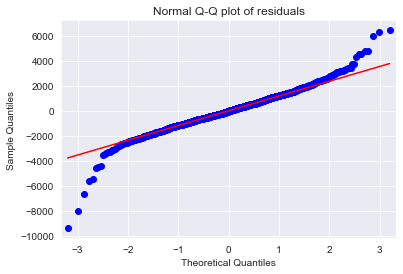

In [317]:
qqplot=sn.qqplot(Toyota_Price.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

error of the model follows normal distribution 

# Residual Ananlysis #second Hypothesis

predicted values are independent of error

In [318]:
def get_standardize_values(vals):
    return (vals-vals.mean())/vals.std()

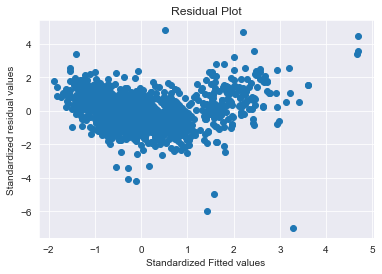

In [319]:
plt.scatter(get_standardize_values(Toyota_Price.fittedvalues),
            get_standardize_values(Toyota_Price.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regression
Features='age','KM','HP','cc','doors','gears','qtax','wt'
checking relation between the errors 

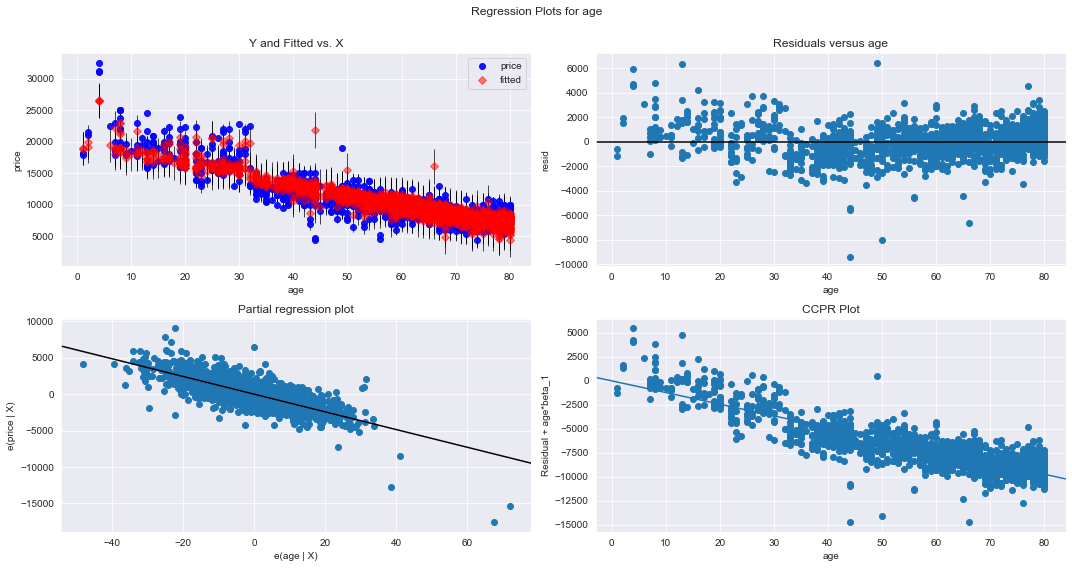

In [320]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Toyota_Price, "age", fig=fig)
plt.show()

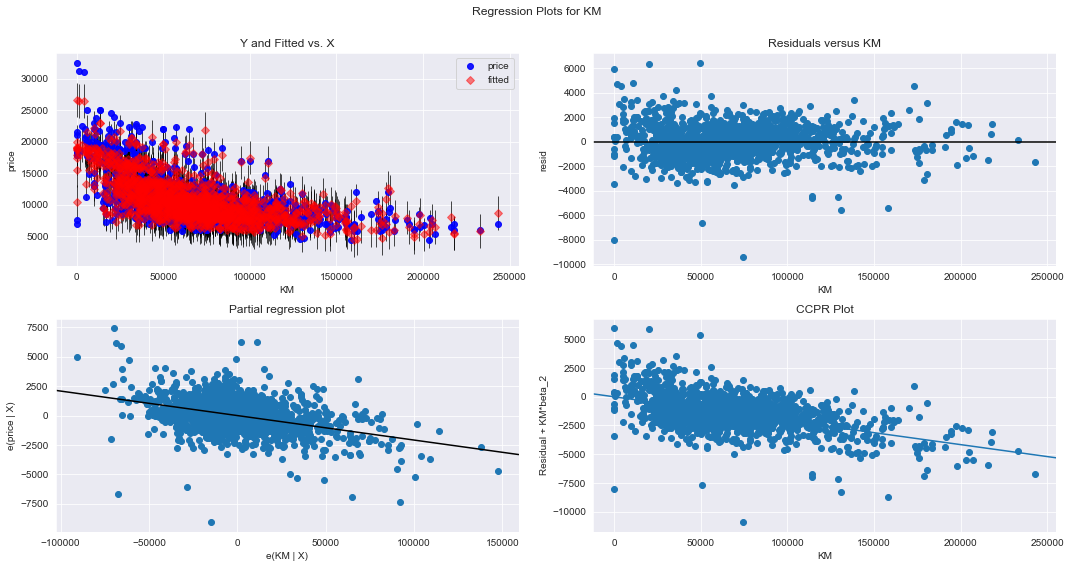

In [321]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Toyota_Price, "KM", fig=fig)
plt.show()

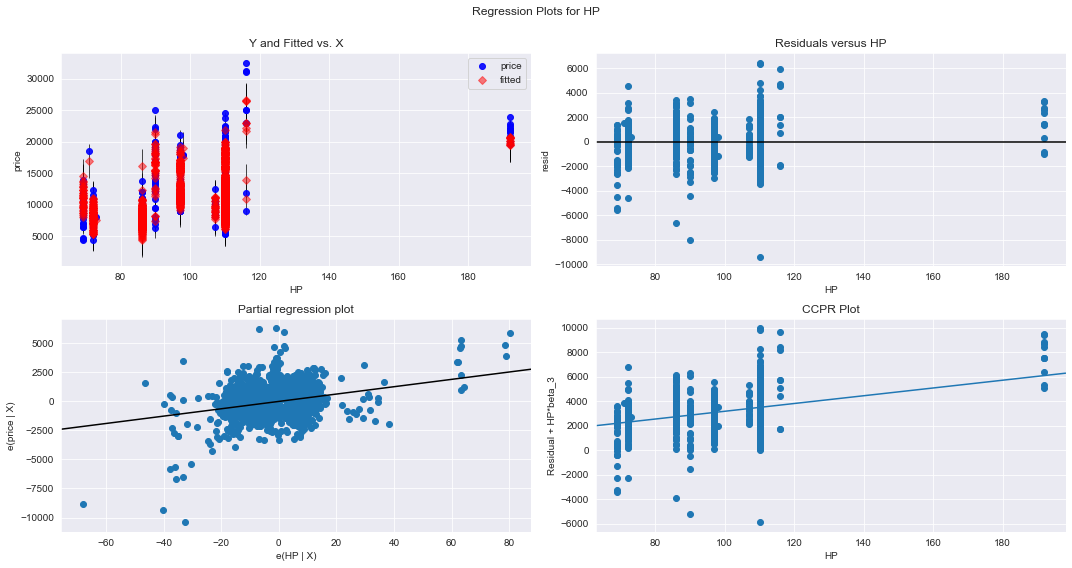

In [322]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Toyota_Price, "HP", fig=fig)
plt.show()

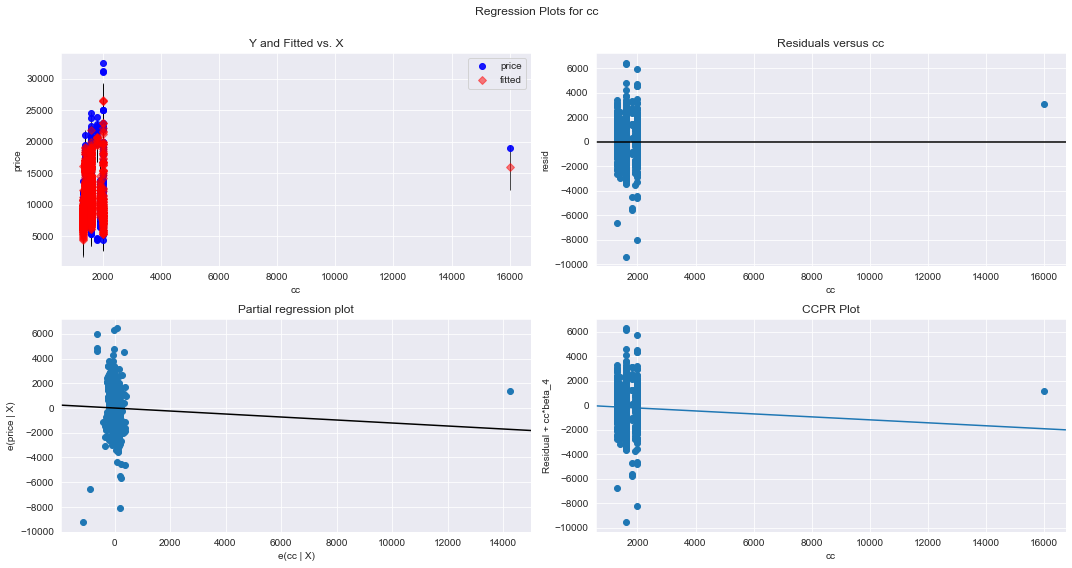

In [323]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Toyota_Price, "cc", fig=fig)
plt.show()

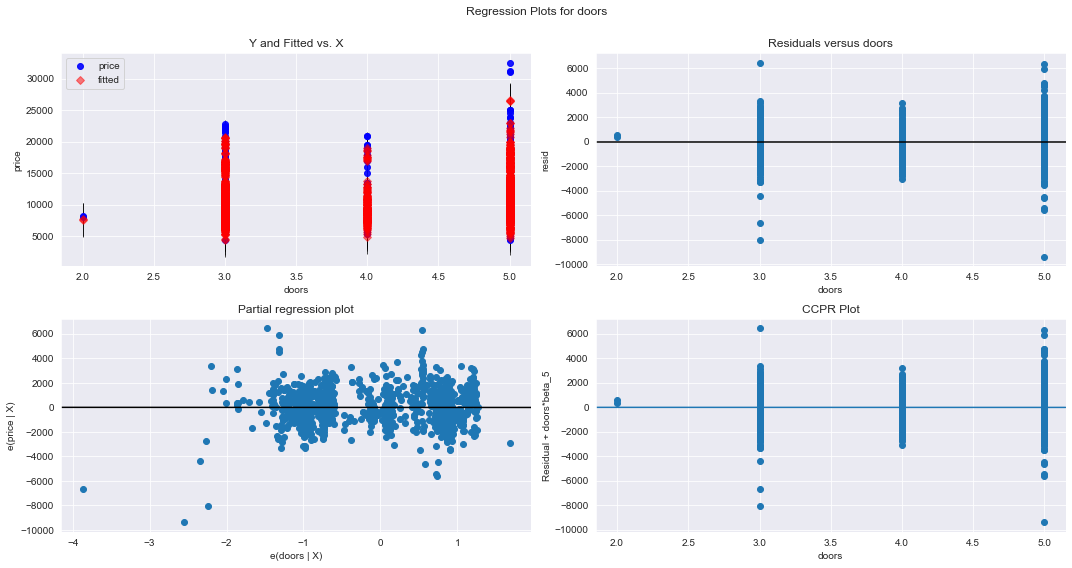

In [324]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Toyota_Price, "doors", fig=fig)
plt.show()

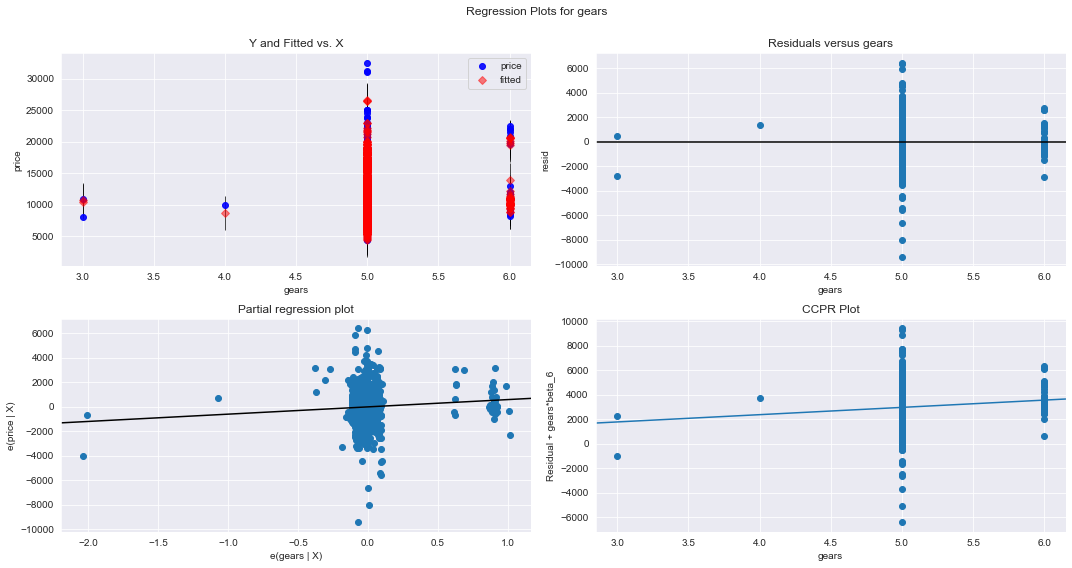

In [325]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Toyota_Price, "gears", fig=fig)
plt.show()

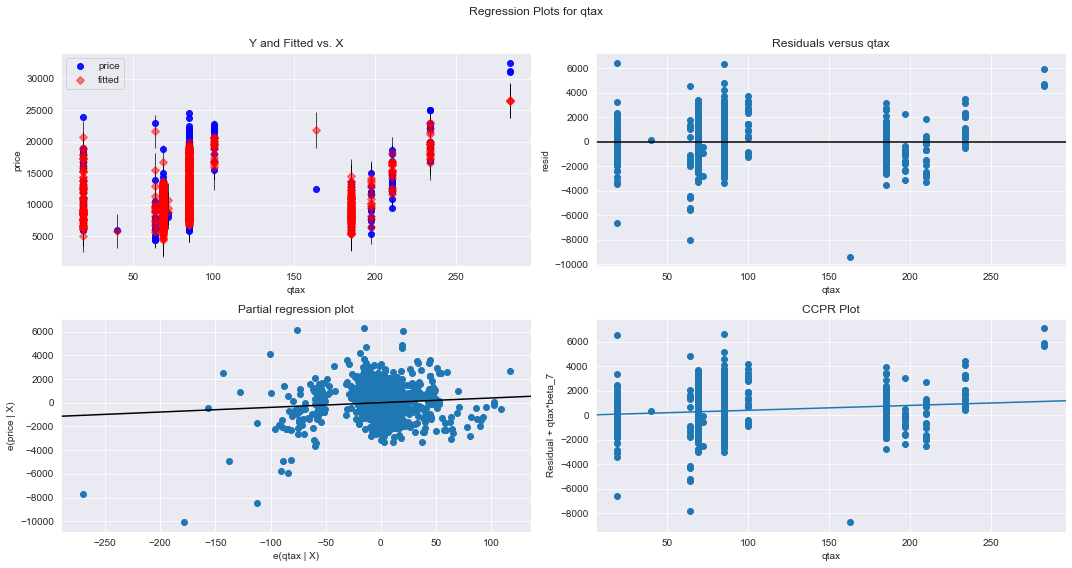

In [326]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Toyota_Price, "qtax", fig=fig)
plt.show()

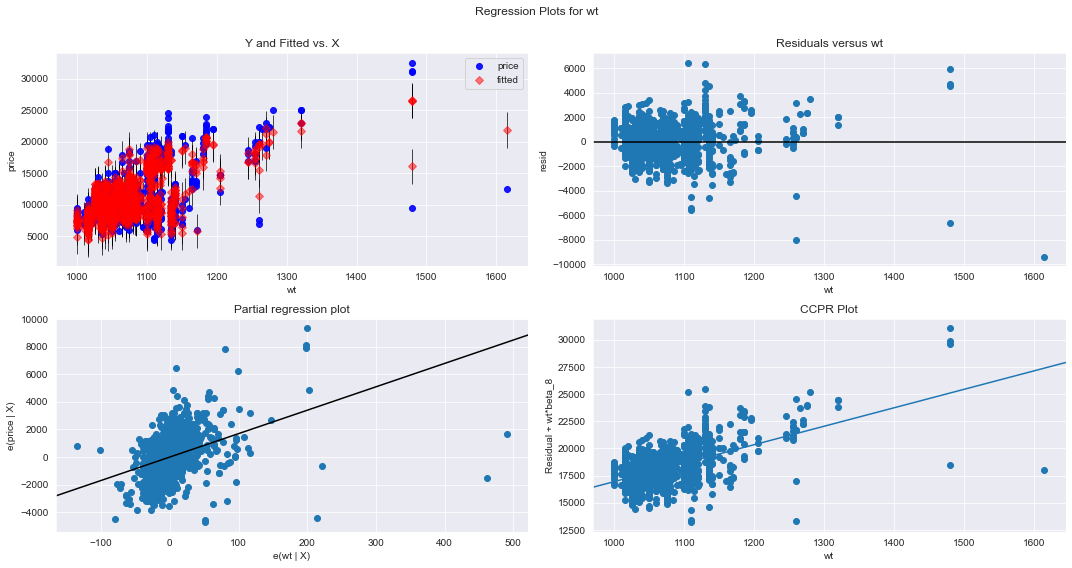

In [327]:
fig = plt.figure(figsize=(15,8))
fig = sn.graphics.plot_regress_exog(Toyota_Price, "wt", fig=fig)
plt.show()

# Detecting Influencers/Outliers

cook's Distance

In [328]:
model_influence=Toyota_Price.get_influence()
(c,_)=model_influence.cooks_distance

In [329]:
k=toyota.shape[1]
n=toyota.shape[0]
Leverage_cutoff=3*((k+1)/n)
Leverage_cutoff

0.020891364902506964

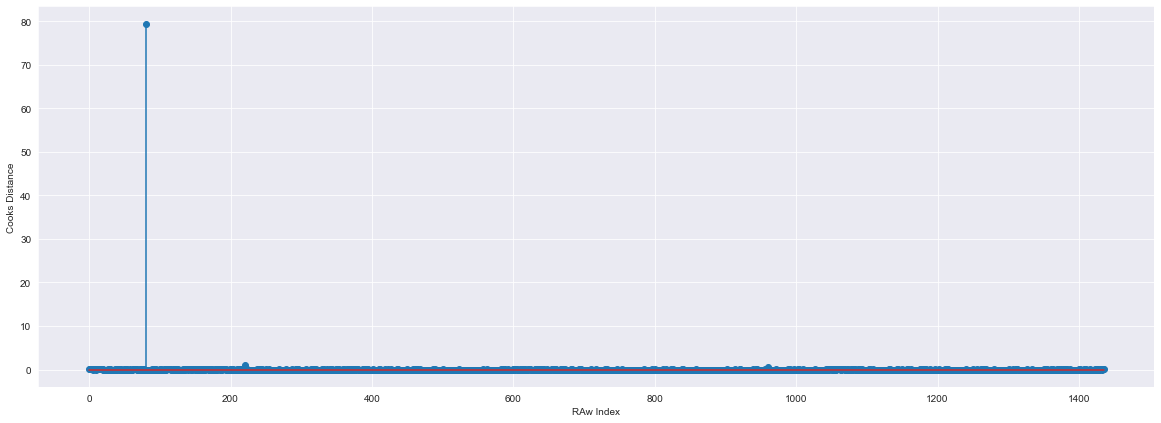

In [330]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota)),np.round(c,3))
plt.xlabel('RAw Index')
plt.ylabel('Cooks Distance')
plt.show()

In [331]:
(np.argmax(c),np.max(c))

(80, 79.52010624143949)

In [332]:
c.argmax(),c.max()

(80, 79.52010624143949)

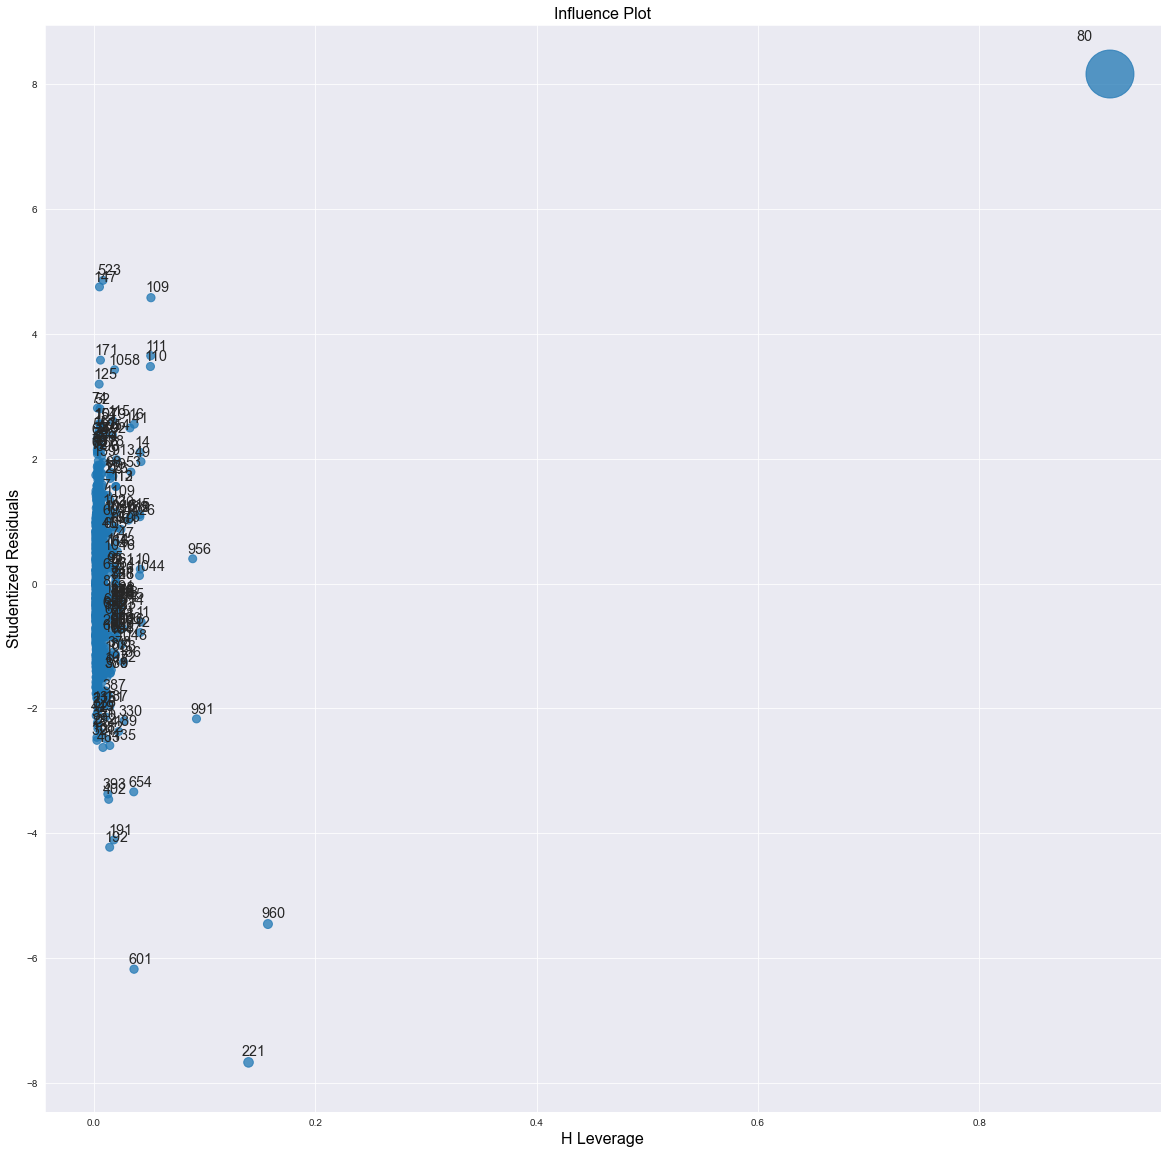

In [333]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(Toyota_Price,ax=ax)

In [334]:
toyota1.shape

(49, 9)

In [335]:
toyota1=toyota
toyota1=toyota.drop(toyota1.index[[80]],axis=0)
toyota1.reset_index()

,index,price,age,KM,HP,cc,doors,gears,qtax,wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [336]:
Toyota_Price=smf.ols('price~age+KM+HP+cc+gears+qtax+wt',data=toyota1).fit()
Toyota_Price.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Tue, 08 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:25:35   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
age         -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM            -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP            39.1593      2.898     13.512      0.000      33.474      44.844
cc            -2.5069      0.306     -8.188      0.000      -3.107      -1.906
gears        549.7311    189.216      2.905      0.004     178.561     920.902
qtax           9.0759      1.424      6.374      0.000       6.283      11.869
wt            19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [337]:

model_influence=Toyota_Price.get_influence()
(c,_)=model_influence.cooks_distance
c.argmax(),c.max()

(220, 2.303445166451864)

In [338]:
toyota1=toyota1.drop(toyota1.index[[220]],axis=0)
toyota1.reset_index()

,index,price,age,KM,HP,cc,doors,gears,qtax,wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,1431,7500,69,20544,86,1300,3,5,69,1025
1430,1432,10845,72,19000,86,1300,3,5,69,1015
1431,1433,8500,71,17016,86,1300,3,5,69,1015
1432,1434,7250,70,16916,86,1300,3,5,69,1015


In [339]:
Toyota_Price=smf.ols('price~age+KM+HP+cc+gears+qtax+wt',data=toyota1).fit()
model_influence=Toyota_Price.get_influence()
(c,_)=model_influence.cooks_distance
c.argmax(),c.max()

(958, 2.290715916303318)

In [340]:
toyota1=toyota1.drop(toyota1.index[[219]],axis=0)
toyota1.reset_index()

,index,price,age,KM,HP,cc,doors,gears,qtax,wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1428,1431,7500,69,20544,86,1300,3,5,69,1025
1429,1432,10845,72,19000,86,1300,3,5,69,1015
1430,1433,8500,71,17016,86,1300,3,5,69,1015
1431,1434,7250,70,16916,86,1300,3,5,69,1015


In [341]:
Toyota_Price=smf.ols('price~age+KM+HP+cc+gears+qtax+wt',data=toyota1).fit()
model_influence=Toyota_Price.get_influence()
(c,_)=model_influence.cooks_distance
c.argmax(),c.max()

(957, 2.288719574321095)

In [342]:
toyota1=toyota1.drop(toyota1.index[[956]],axis=0)
toyota1.reset_index()

,index,price,age,KM,HP,cc,doors,gears,qtax,wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,1431,7500,69,20544,86,1300,3,5,69,1025
1428,1432,10845,72,19000,86,1300,3,5,69,1015
1429,1433,8500,71,17016,86,1300,3,5,69,1015
1430,1434,7250,70,16916,86,1300,3,5,69,1015


In [343]:
Toyota_Price=smf.ols('price~age+KM+HP+cc+gears+qtax+wt',data=toyota1).fit()
model_influence=Toyota_Price.get_influence()
(c,_)=model_influence.cooks_distance
c.argmax(),c.max()

(956, 2.2887909125995898)

In [344]:
toyota1=toyota1.drop(toyota1.index[[597]],axis=0)
toyota1.reset_index()

,index,price,age,KM,HP,cc,doors,gears,qtax,wt
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1426,1431,7500,69,20544,86,1300,3,5,69,1025
1427,1432,10845,72,19000,86,1300,3,5,69,1015
1428,1433,8500,71,17016,86,1300,3,5,69,1015
1429,1434,7250,70,16916,86,1300,3,5,69,1015


In [345]:
Toyota_Price=smf.ols('price~age+KM+HP+cc+gears+qtax+wt',data=toyota1).fit()
model_influence=Toyota_Price.get_influence()
(c,_)=model_influence.cooks_distance
c.argmax(),c.max()

(955, 2.285571917610854)

In [346]:
toyota2=toyota1

In [349]:
while np.max(c)>0.2:
    Toyota_Price=smf.ols('price~age+KM+HP+cc+gears+qtax+wt',data=toyota1).fit()
    model_influence=Toyota_Price.get_influence()
    (c,_)=model_influence.cooks_distance
    np.argmax(c),np.max(c)
    toyota1=toyota1.drop(toyota1.index[np.argmax(c)],axis=0)
    toyota1.reset_index()


In [350]:
toyota1.shape

(1428, 9)

In [351]:
oyota_Price=smf.ols('price~age+KM+HP+cc+gears+qtax+wt',data=toyota1).fit()

In [352]:
Toyota_Price.rsquared

0.8885183181844949

# after Deleting data points we achieve R value 0.885

# So Toyota_Price is the Model we will choose 